In [265]:
import pandas as pd
import numpy as np

columns = [
    "Patient id number", 
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
    "Class"
]
pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", index_col=None)
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", 
                   index_col=None, names=columns)
data.head()

,Patient id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [266]:
#some data cleaning:

#Turn the "Class" column into 1's and 0's
classes = np.array(data["Class"])
newClasses = [(1 if n == 4 else 0) for n in classes]
data["Class"] = newClasses


# Get rid of the rows that contain unusable question mark entries
# in the "Bare Nuclei" column
data = data[[(False if n=="?" else True) for n in data["Bare Nuclei"]]]
data["Bare Nuclei"].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')


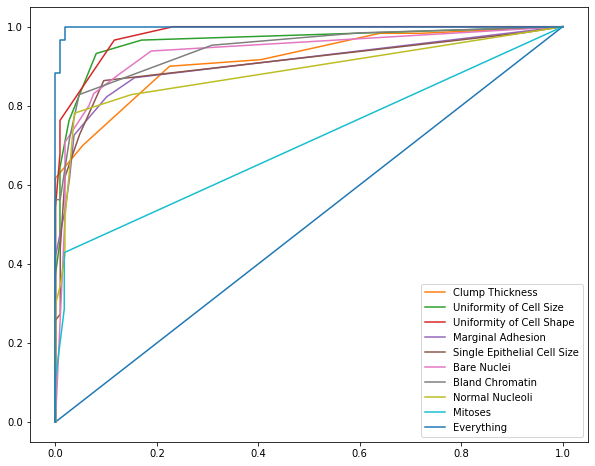

In [267]:
from sklearn.linear_model import LogisticRegression as LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
def binaryTrain(model, x, y, name):
    y = np.array(y)
    xtrain, xtest, ytrain, ytest = train_test_split(x,y)
    model.fit(xtrain,ytrain)
    yprobability = model.predict_proba(xtest)[:, 1]
    ypredict = model.predict(xtest)
    fpr, tpr, thresholds =  metrics.roc_curve(ytest, yprobability)
    plt.plot(fpr, tpr, label=name)
    plt.legend()
    

plt.plot([0, 1], [0, 1])
fig = plt.gcf()
fig.set_size_inches(10,8)


lr = LogisticRegression()
for i in range(1,10):
    binaryTrain(lr, np.array(data.iloc[:,i]).reshape(-1,1),
                np.array(data["Class"]), data.columns[i])
    
print(data.iloc[:,range(1,10)].columns)
binaryTrain(lr, data.iloc[:,range(1,10)],
            np.array(data["Class"]), "Everything")
